<a href="https://colab.research.google.com/github/tavarel/FerramentasAnalisesFinanceiras/blob/main/Python_para_finan%C3%A7as_classifica%C3%A7%C3%A3o_e_agrupamento_de_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - classificação e agrupamento de empresas com machine learning

## Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Classificação de empresas com machine learning

- Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com. Para o acesso de tais informações, foi necessário comprar uma conta
- Empresas com indisponibilidade de informações
ficaram com seus respectivos campos vazios
- **Atributo situação (classe)**: este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10

## Carregamento e pré-processamento da base de dados

In [ ]:
dataset = pd.read_excel('/content/BD Completo.xlsx')

In [ ]:
dataset.shape

(377, 70)

In [ ]:
dataset

,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,EV/EBITDA,P/VPA,DPA,Dividend Yield,Payout,Margem Segurança,Rec. Liquida,Luc. Liquido,Luc. Liq * NR,Resultado Bruto,Margem Bruta,EBIT,D&A,EBITDA,Margem EBITDA,Res. Financeiro,Margem Liquida,ROE,ROA,SSS,Patri. Liquido,RIF,Margem Bancaria,Indc. Eficiencia,Indc. Basileia,PDD,PDD/LL,Equity Multi.,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,Div Liquida/EBITDA,Indice de Cobertura,Despesas com juros,EF,ECP,Custo % da divida,EM,IPL,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,36.03,24.71,24.71,NaN,0.38,0.12,0.85,21.12,-0.53,9895.0,555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0648,20.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0,3501.000,2721.0,1567.00,0.86,NaN,NaN,NaN,49.00,11.0,NaN,3.94,169.0,4610.0,4508.0,545.0,1.02,0.12,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,0.80,14.92,14.92,NaN,3.39,0.98,15.27,224.68,22.00,2143.0,703.0,NaN,1710.00,87.95,1084.0,165.0,1250.00,61.43,-55.0,34.6900,37.00,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1812.0,537.000,2997.0,2459.00,1.72,2.03,5.28,300.0,58.00,15.0,10.0,2.40,NaN,776.0,828.0,583.0,0.94,0.70,-52.0,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.00,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,2.07,31.55,31.55,NaN,2.42,0.15,2.98,94.08,-63.00,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.1500,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,8.000,0.0,-8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,NaN,12.0,8.0,9.0,1.50,1.13,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,"neoenergia s.a (87,84)",8.0,alerta,0.21,0.20,1.23,21.69,21.69,NaN,3.61,0.19,4.25,92.20,46.00,31.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0000,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,35.000,3.0,-31.00,0.04,NaN,NaN,NaN,5.25,23.0,NaN,1.15,NaN,74.0,7.0,42.0,10.57,6.00,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,"admistradora fortaliza ltda (89,14%)",11290.0,crescimento moderado,0.60,0.60,10.42,5.65,5.65,NaN,0.32,NaN,NaN,NaN,116.00,10.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.4500,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.0,580.000,140.0,-440.75,0.25,NaN,NaN,NaN,NaN,NaN,NaN,1.01,NaN,6.0,6.0,3.0,1.00,0.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,"whirlpool do brasil ltda (49,94%)",NaN,dividendos,0.21,0.21,1.69,15.64,15.64,9.4,1.94,NaN,NaN,NaN,26.00,8447.0,NaN,1782.0,21.24,661.00,160.0,821.0,9.71,-5.75,519.0,6.1800,24.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2130.0,627.000,205.0,-421.00,0.09,NaN,340.00,3.0,10.00,47.0,1.0,2.63,NaN,4275.0,3598.0,756.0,1.19,0.21,677.0,768.0,-212.0,-519.0,35.0,555.0,50.00,-207.0,560.0,0.48,28.0
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,NaN,NaN,"ocean wilsons holdings limited (58,30%)",176.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3600,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,331.000,810.0,478.00,0.74,NaN,NaN,NaN,42.00,9.0,NaN,2.13,145.0,936.0,492.0,512.0,1.90,1.04,444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,ruim,wlm industria e comercia s.a sgas,mate

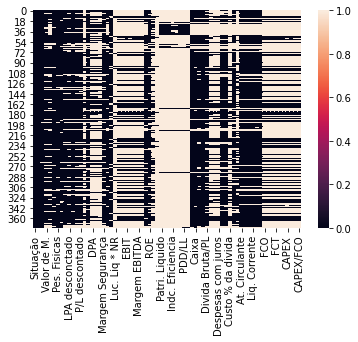

In [ ]:
sns.heatmap(dataset.isnull());

In [ ]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação                 0
Empresa                  0
Segmento                 3
Valor de M.             58
EV                      92
Majoritar.              16
Pes. Fisicas            19
Categoria               29
LPA                     41
LPA desconctado         60
VPA                     38
P/L                     61
P/L descontado          66
EV/EBITDA              245
P/VPA                   64
DPA                    236
Dividend Yield         236
Payout                 257
Margem Segurança        56
Rec. Liquida            51
Luc. Liquido            52
Luc. Liq * NR          326
Resultado Bruto        240
Margem Bruta           240
EBIT                   238
D&A                    239
EBITDA                 238
Margem EBITDA          239
Res. Financeiro        239
Margem Liquida          59
ROE                     49
ROA                    222
SSS                    363
Patri. Liquido         348
RIF                    348
Margem Bancaria        348
Indc. Eficiencia       357
I

In [ ]:
dataset.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR',
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA',
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF',
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO',
                      'Majoritar.'],
             axis = 1, inplace = True)

In [ ]:
dataset.shape

(377, 32)

In [ ]:
pd.set_option('max_rows', 10)
dataset

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.57,0.56,36.03,24.71,24.71,0.38,-0.53,9895.0,555.0,0.0648,20.66,2012.0,3501.000,2721.0,1567.00,0.86,49.00,11.0,3.94,4610.0,4508.0,545.0,1.02,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,18681.0,dividendos,0.18,0.18,0.80,14.92,14.92,3.39,22.00,2143.0,703.0,34.6900,37.00,1812.0,537.000,2997.0,2459.00,1.72,58.00,15.0,2.40,776.0,828.0,583.0,0.94,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.16,0.15,2.07,31.55,31.55,2.42,-63.00,30.0,13.0,38.1500,25.00,48.0,8.000,0.0,-8.00,NaN,NaN,NaN,1.24,12.0,8.0,9.0,1.50,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.21,0.20,1.23,21.69,21.69,3.61,46.00,31.0,17.0,56.0000,22.00,78.0,35.000,3.0,-31.00,0.04,5.25,23.0,1.15,74.0,7.0,42.0,10.57,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,0.60,10.42,5.65,5.65,0.32,116.00,10.0,45.0,157.4500,6.00,721.0,580.000,140.0,-440.75,0.25,NaN,NaN,1.01,6.0,6.0,3.0,1.00,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,NaN,dividendos,0.21,0.21,1.69,15.64,15.64,1.94,26.00,8447.0,NaN,6.1800,24.00,2130.0,627.000,205.0,-421.00,0.09,10.00,47.0,2.63,4275.0,3598.0,756.0,1.19,0.21,677.0
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,NaN,NaN,176.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261.0,109.0,9.3600,11.00,1060.0,331.000,810.0,478.00,0.74,42.00,9.0,2.13,936.0,492.0,512.0,1.90,1.04,444.0
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.0,alerta,-0.52,-0.52,11.61,-7.35,-7.35,0.33,-271.00,777.0,21.0,2.2100,5.00,452.0,135.000,0.0,-135.00,NaN,NaN,NaN,1.18,179.0,59.0,46.0,3.03,0.78,120.0
375,ruim,zain participações s.a opzi,outros,NaN,NaN,2.0,alerta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.0,NaN,NaN,4.0,2.000,NaN,-2.00,NaN,NaN,NaN,NaN,4.0,1.0,1.0,4.00,1.00,3.0


In [ ]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

In [ ]:
dataset.fillna(dataset.mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64

In [ ]:
(20 / 377) * 100

5.305039787798409

In [ ]:
dataset.dropna(inplace=True)
dataset.shape

(347, 32)

In [ ]:
pd.set_option('max_rows', 10)

## Visualização e exploração

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA desconctado   347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 1

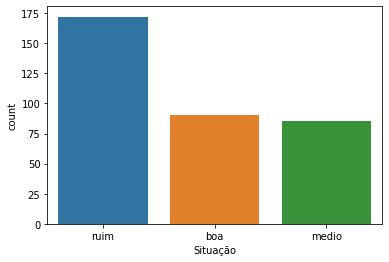

In [ ]:
sns.countplot(x = dataset['Situação']);

In [ ]:
np.unique(dataset['Situação'], return_counts=True)

(array(['boa', 'medio', 'ruim'], dtype=object), array([ 90,  85, 172]))

In [ ]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
        'agua e saneamento', 'alimentos', 'alimentos diversos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'edificações',
        'eletrodomesticos', 'eletrodomésticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

In [ ]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto

  return segmento

In [ ]:
corrige_segmento('tansporte aereo')

'transporte aereo'

In [ ]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)

In [ ]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'credito',
        'edificações', 'eletrodomesticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings diversificadas', 'hospitalar', 'hotelaria',
        'intermediação imobilia

In [ ]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento ', 'crescimento moderado',
        'dividendos', 'dividendos + crescimento'], dtype=object),
 array([243,  17,   1,  48,  36,   2]))

In [ ]:
def corrige_categoria(texto):
  categoria = ''
  if texto == 'crescimento ':
    categoria = 'crescimento'
  else:
    categoria = texto

  return categoria

In [ ]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)

In [ ]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2]))

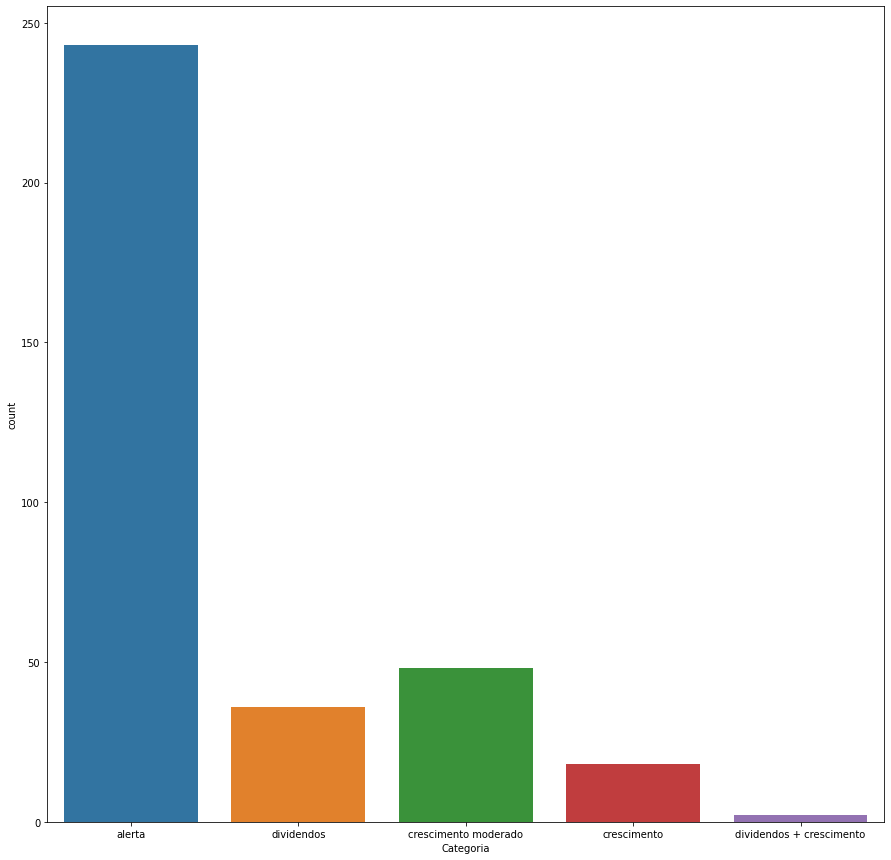

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = dataset['Categoria']);

In [ ]:
dataset.describe()

,Valor de M.,EV,Pes. Fisicas,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
count,3.470000e+02,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,8.803913e+09,1.045164e+10,2.226064e+04,-7.862101,-9.044851,38.573753,11.139852,12.873580,1.532269,-8.271226e+03,5010.663063,275.393208,13.146021,17.779244,3921.542122,1064.497195,3370.063249,2197.970227,1.763929,29.440006,38.957579,60.010565,3419.550616,2637.292240,1337.298603,2.068703,1.029286,772.802867
std,2.715437e+10,3.435244e+10,1.309892e+05,65.493749,64.456790,842.780784,85.152313,81.671064,2.677774,7.839801e+04,17236.906237,1428.320653,701.080695,23.231773,18025.987138,3568.988904,14968.294847,11614.244102,4.358198,145.468109,23.070951,412.828926,9719.816539,6880.722470,4362.187061,2.903694,2.563236,4676.082846
min,6.750600e+04,-2.623695e+07,1.000000e+00,-806.670000,-806.660000,-3804.860000,-866.700000,-312.210000,-15.600000,-1.079664e+06,1.000000,-2494.000000,-8001.210000,0.000000,-4512.000000,-0.125000,0.000000,-8882.000000,0.000000,-1920.000000,0.000000,1.010000,0.000000,1.000000,0.000000,0.000000,0.000000,-34042.000000
25%,1.651804e+08,3.716960e+08,5.805000e+02,-2.030000,-5.680000,2.695000,-0.615000,-0.555000,0.475000,-8.590000e+02,326.500000,-7.000000,-1.175000,8.000000,168.500000,47.000000,133.500000,28.500000,0.505000,21.500000,22.000000,1.950000,232.000000,203.500000,40.500000,0.970000,0.170000,-1.500000
50%,1.362357e+09,3.583574e+09,1.773000e+03,0.130000,0.086000,9.470000,8.830000,9.580000,1.130000,-8.100000e+01,1462.000000,30.000000,6.180000,14.000000,1046.000000,323.000000,977.000000,458.000000,1.110000,31.000000,38.872065,3.030000,1307.000000,1022.000000,455.000000,1.660000,0.600000,243.000000
75%,8.596999e+09,1.021776e+10,6.354500e+03,1.185000,1.060000,22.565000,14.765000,14.840000,1.700000,-1.555000e+00,4752.448221,307.596923,12.658474,18.404238,3401.500000,1006.666295,3203.312693,2080.015076,1.720811,52.500000,51.500000,43.680000,3259.653397,2536.304858,1274.283912,2.023817,0.999146,714.528481
max,2.866893e+11,4.998736e+11,1.803724e+06,200.660000,160.780000,14896.470000,861.240000,952.660000,24.760000,1.344470e+05,270810.000000,17415.000000,8402.000000,285.430000,288806.000000,59223.000000,258468.000000,199245.000000,68.000000,1197.000000,100.000000,6723.190000,145907.000000,81167.000000,71664.000000,30.750000,30.500000,64740.000000


In [ ]:
dataset[dataset['Divida Liquida'] == 199245.000000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
284,boa,petroleo brasileiro s.a petrobras petr,"exploração, refino e distribuição",1.857536e+11,4.998736e+11,288002.0,alerta,-1.0,0.9,19.37,-14.15,15.71,0.73,-181.0,270810.0,307.596923,4.94,10.0,288806.0,59223.0,258468.0,199245.0,0.92,44.0,10.0,3.33,145907.0,81167.0,71664.0,1.8,0.88,64740.0


In [ ]:
dataset[dataset['Caixa'] == -0.125000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
376,ruim,524 participações s.a,outros,8.596999e+09,1.021776e+10,1.0,alerta,-7.560357,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,4752.448221,307.596923,12.658474,18.404238,3709.284884,-0.125,3203.312693,2080.015076,1.720811,30.548746,38.872065,62.646871,3259.653397,2536.304858,1274.283912,2.023817,0.999146,714.528481


In [ ]:
dataset[dataset['Caixa'] == 59223.000000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
284,boa,petroleo brasileiro s.a petrobras petr,"exploração, refino e distribuição",1.857536e+11,4.998736e+11,288002.0,alerta,-1.0,0.9,19.37,-14.15,15.71,0.73,-181.0,270810.0,307.596923,4.94,10.0,288806.0,59223.0,258468.0,199245.0,0.92,44.0,10.0,3.33,145907.0,81167.0,71664.0,1.8,0.88,64740.0


In [ ]:
dataset[dataset['LPA'] == -806.670000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,-0.39,-0.39,0.02,-2999.0,65.0,3.0,2.35,2.0,236.0,34.0,50.0,15.0,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


In [ ]:
dataset[dataset['LPA'] == 200.660000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
254,ruim,minasmaquinas s.a mmaq,material de transporte,8.596999e+09,1.021776e+10,1055.0,alerta,200.66,-8.723009,1605.35,10.669968,12.338617,1.677604,-7975.95134,236.0,9.0,4.26,14.0,69.0,13.0,19.0,5.0,0.31,18.0,100.0,1.49,130.0,51.0,47.0,2.55,0.92,79.0


In [ ]:
dataset[dataset['LPA desconctado'] == 160.780000]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Rec. Liquida,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Caixa,Divida bruta,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
194,ruim,hercules s.a fabrica de talheres heta,utensilios domesticos,2121596.0,307121596.0,592.0,alerta,160.78,160.78,-656.86,0.02,0.02,1.677604,44463.0,4.0,2.0,1633.0,18.404238,-334.0,1006.666295,135.0,135.0,1.720811,-360.0,25.0,62.646871,1.0,8.0,0.0,0.13,0.0,-7.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


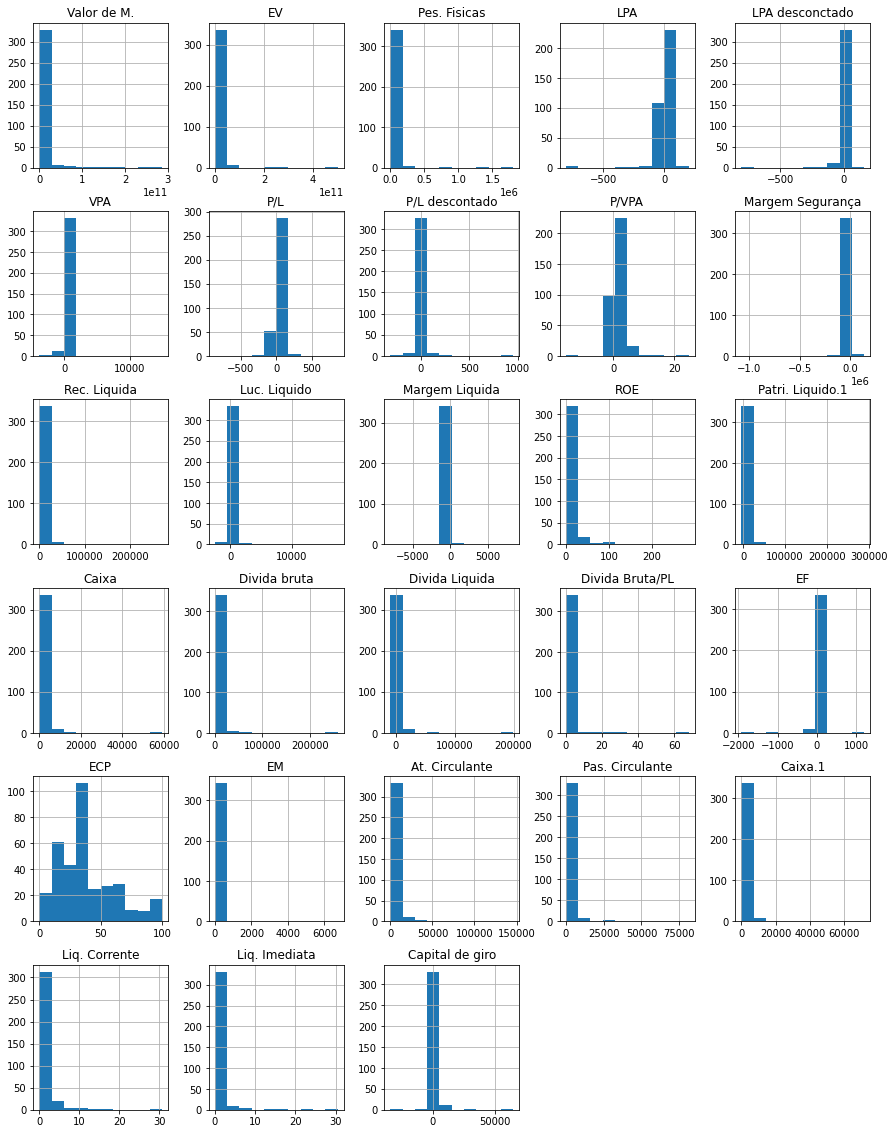

In [ ]:
figura = plt.figure(figsize=(15,20))
eixo = figura.gca()
dataset.hist(ax = eixo);

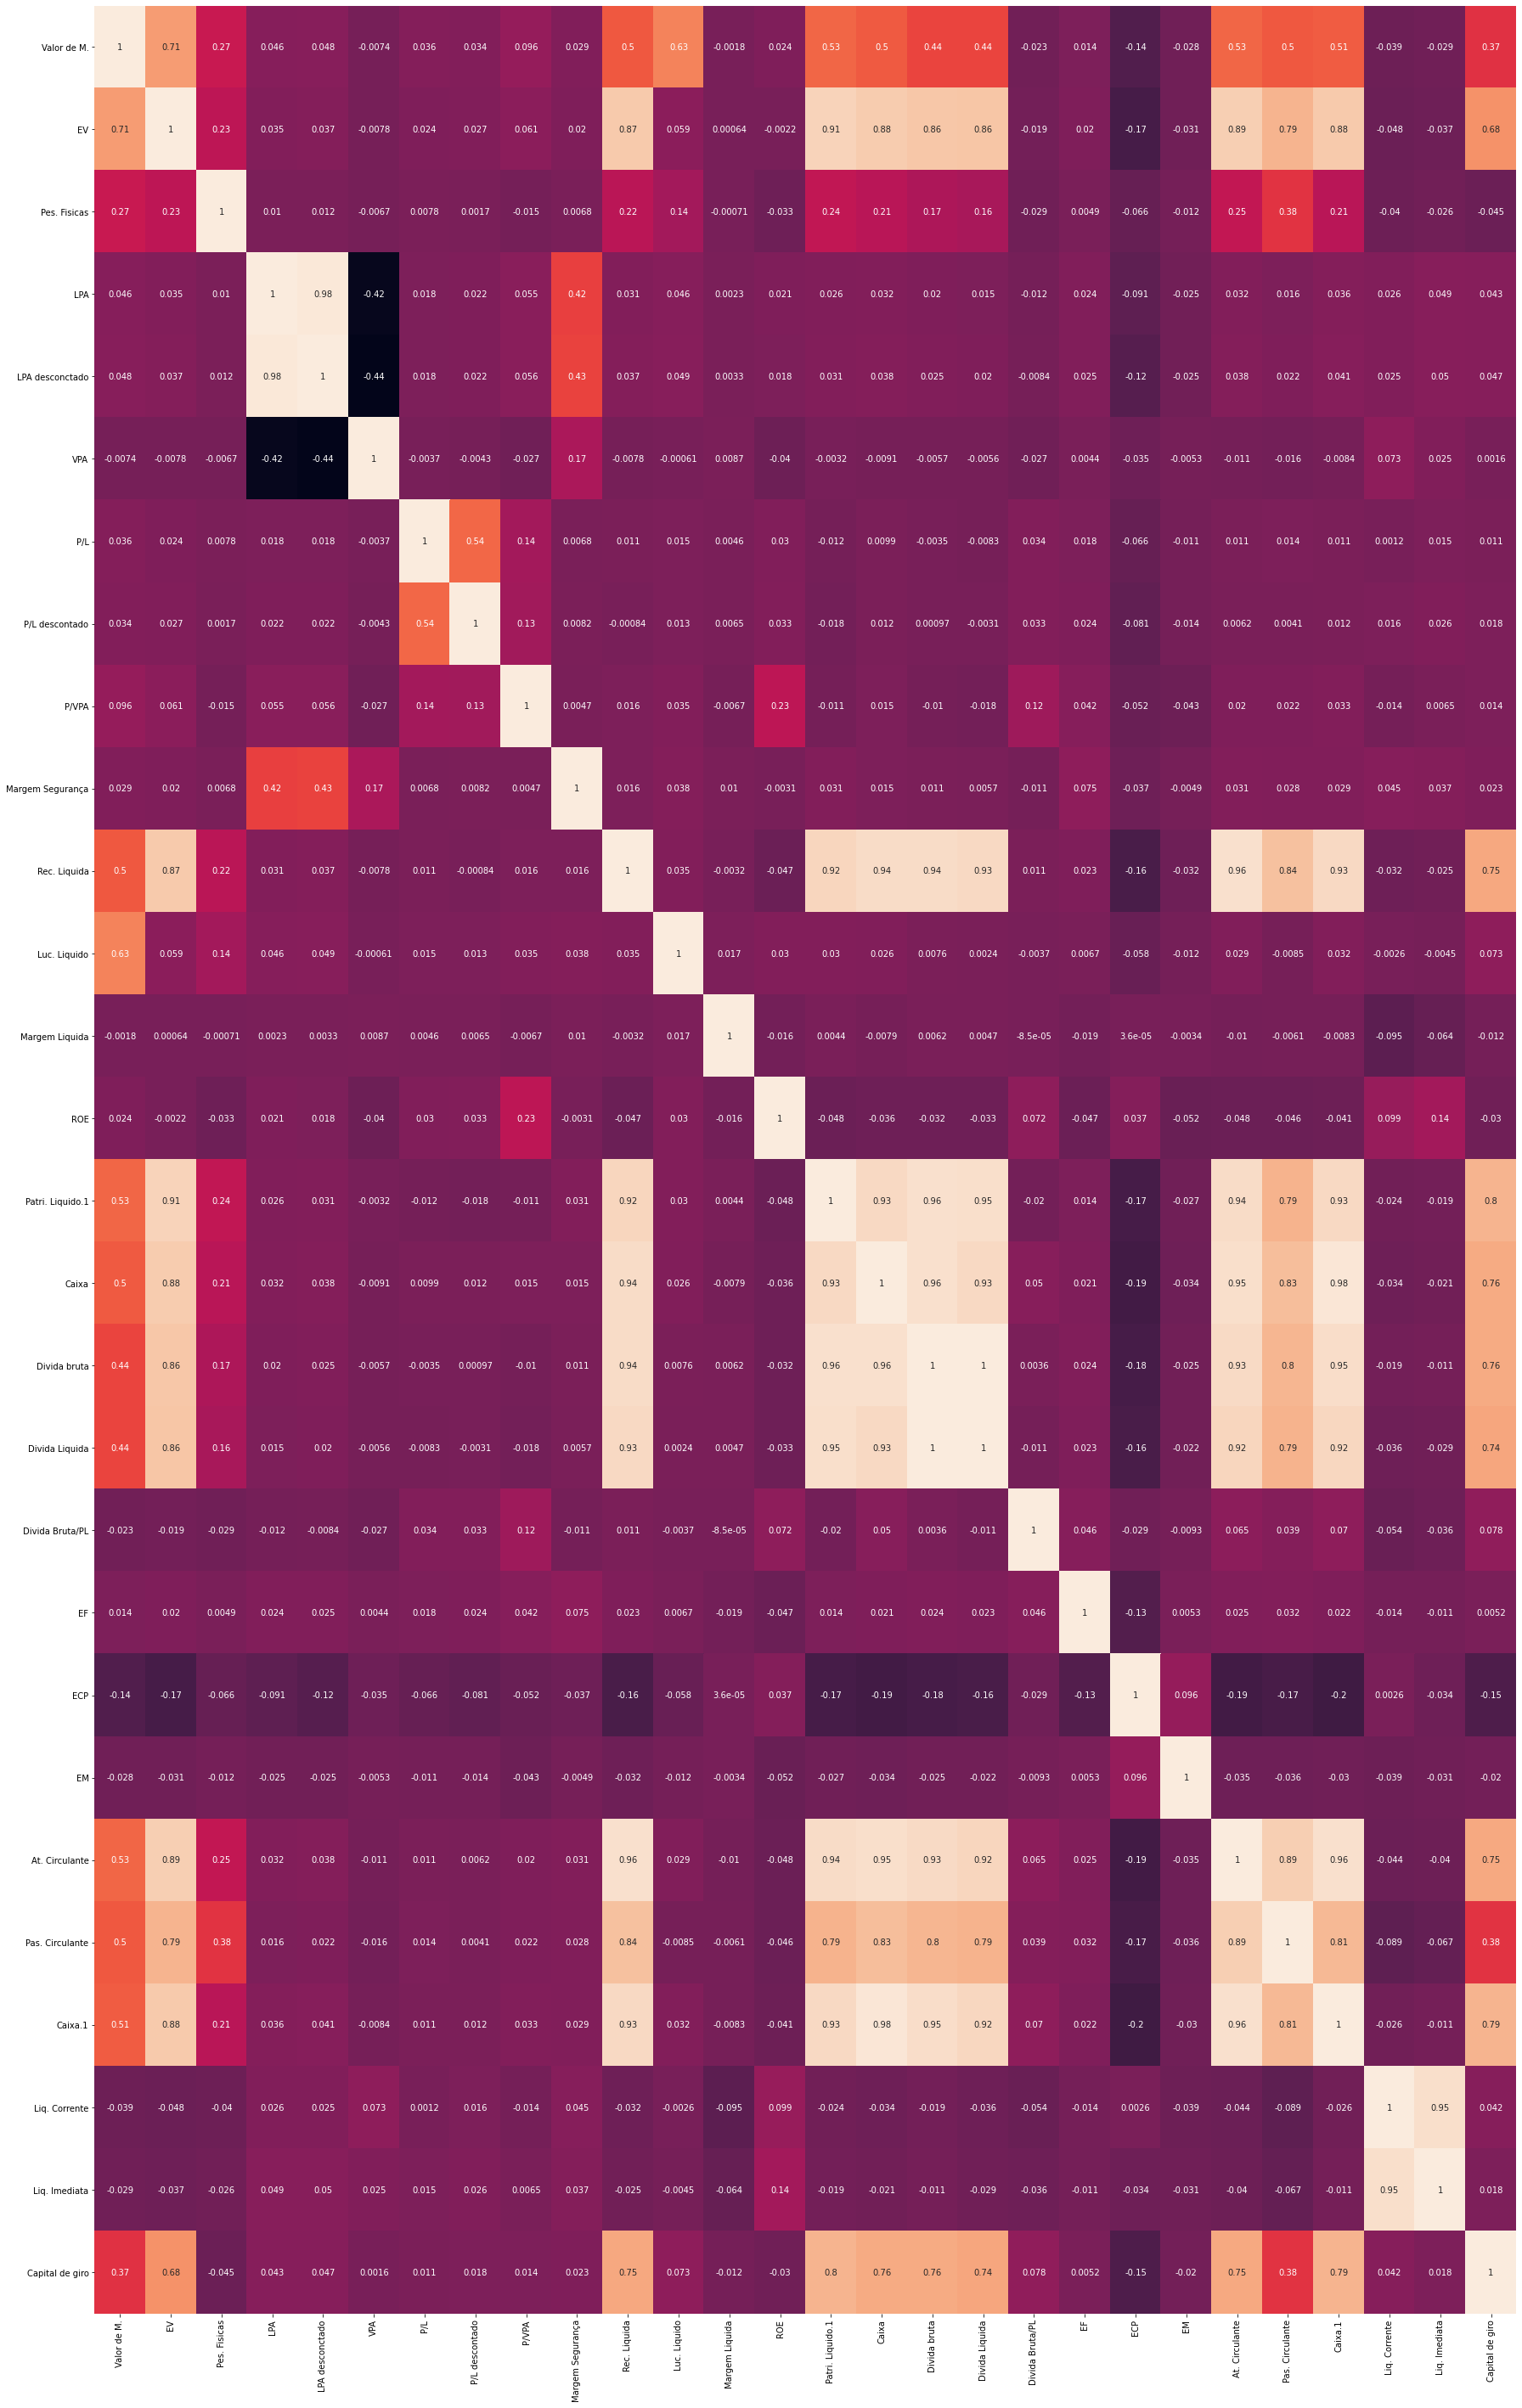

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

In [ ]:
dataset.drop(['Rec. Liquida', 'Caixa'], axis = 1, inplace = True)

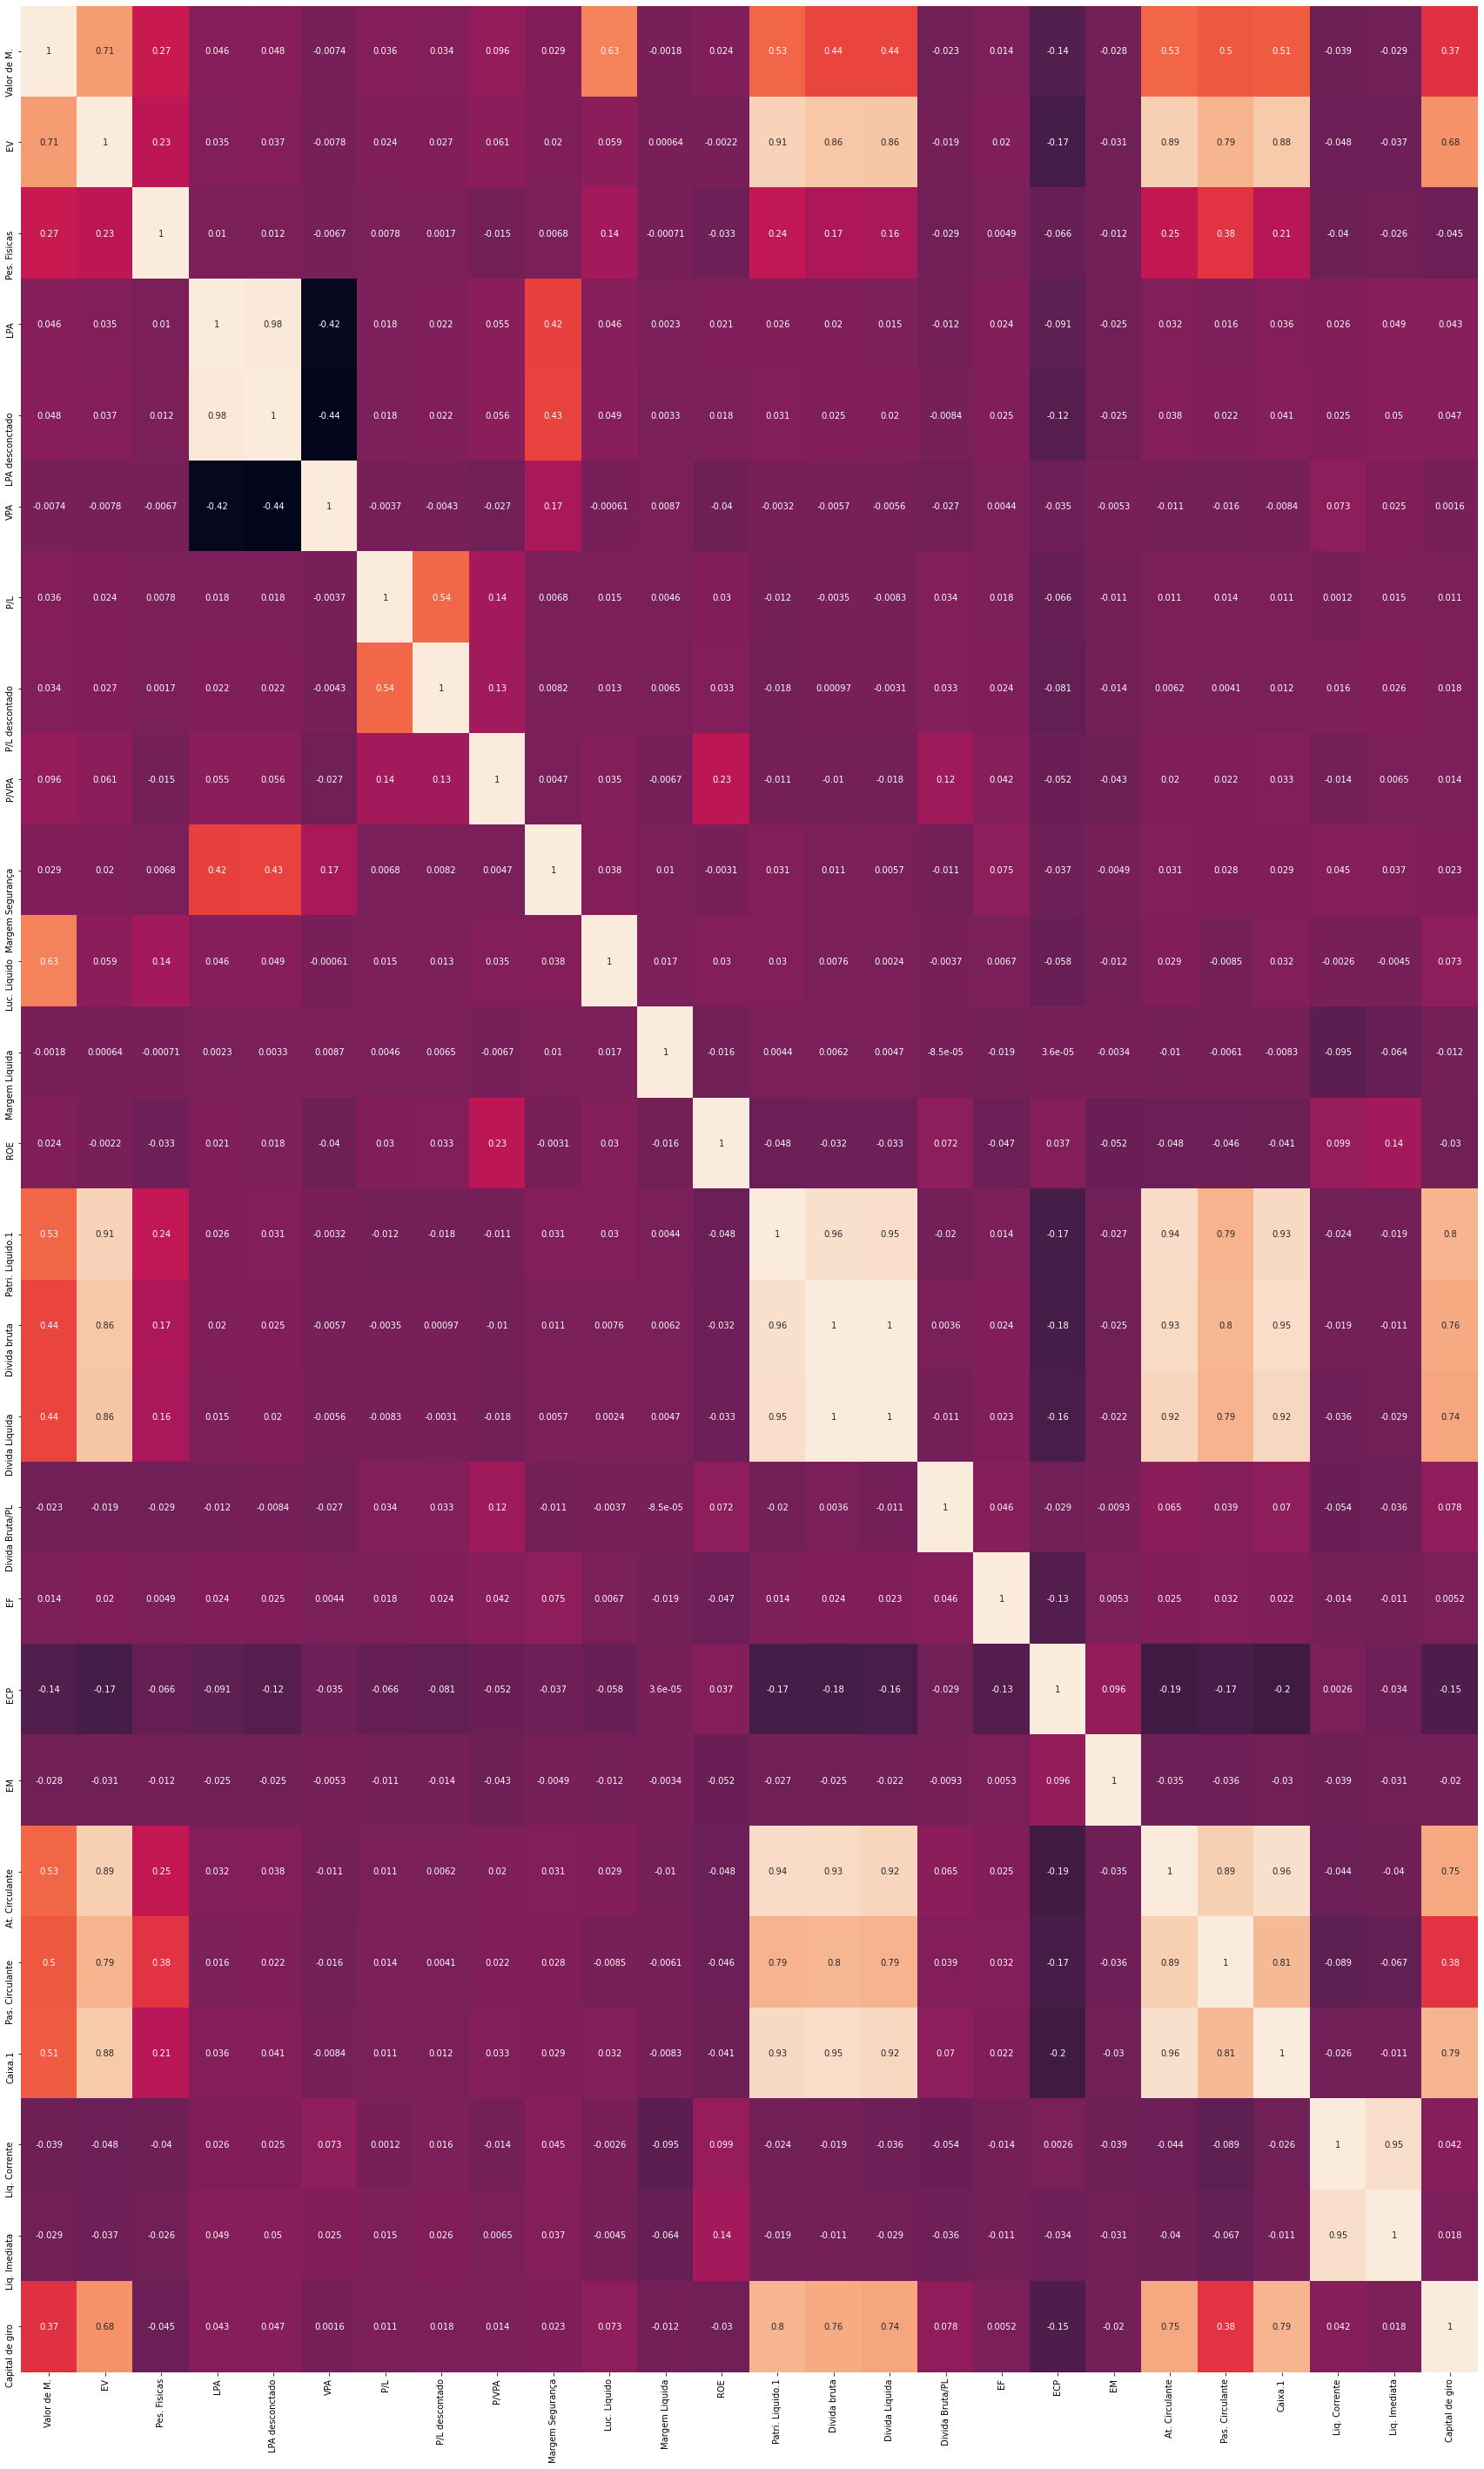

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

In [ ]:
dataset.drop(['Divida bruta', 'LPA', 'Caixa.1'], axis = 1, inplace = True)

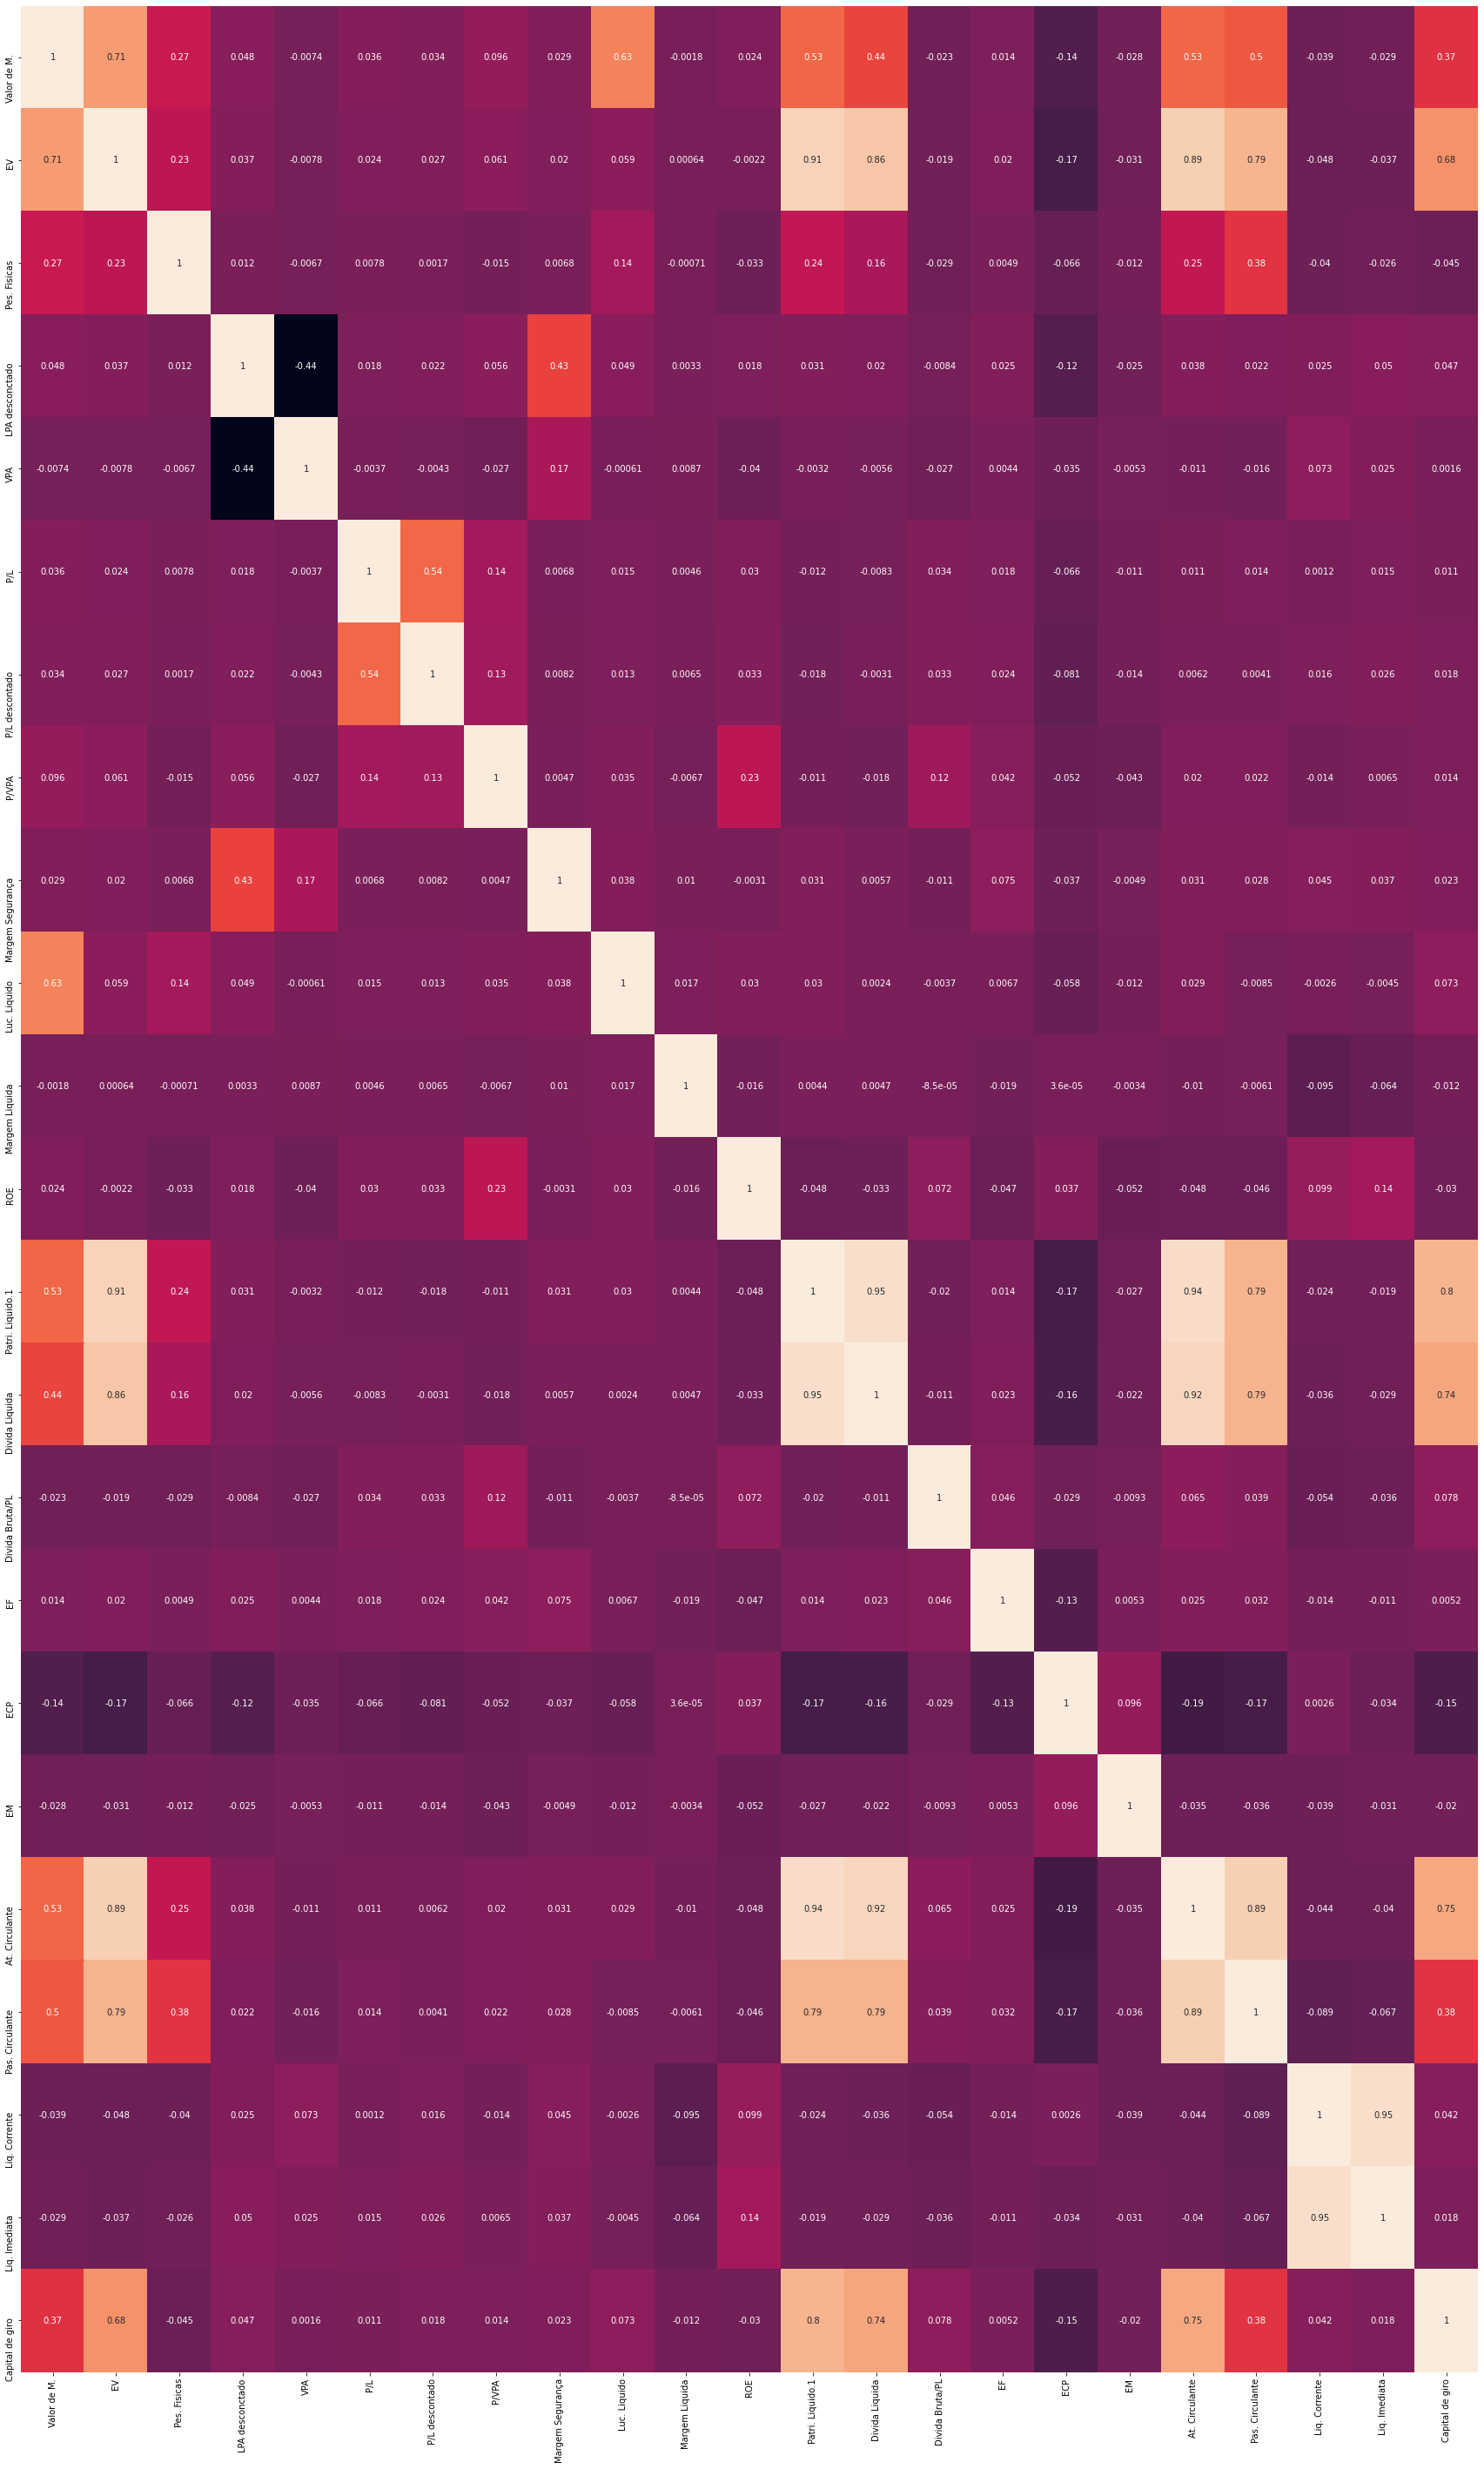

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

In [ ]:
dataset.drop(['At. Circulante', 'Liq. Corrente'], axis = 1, inplace = True)

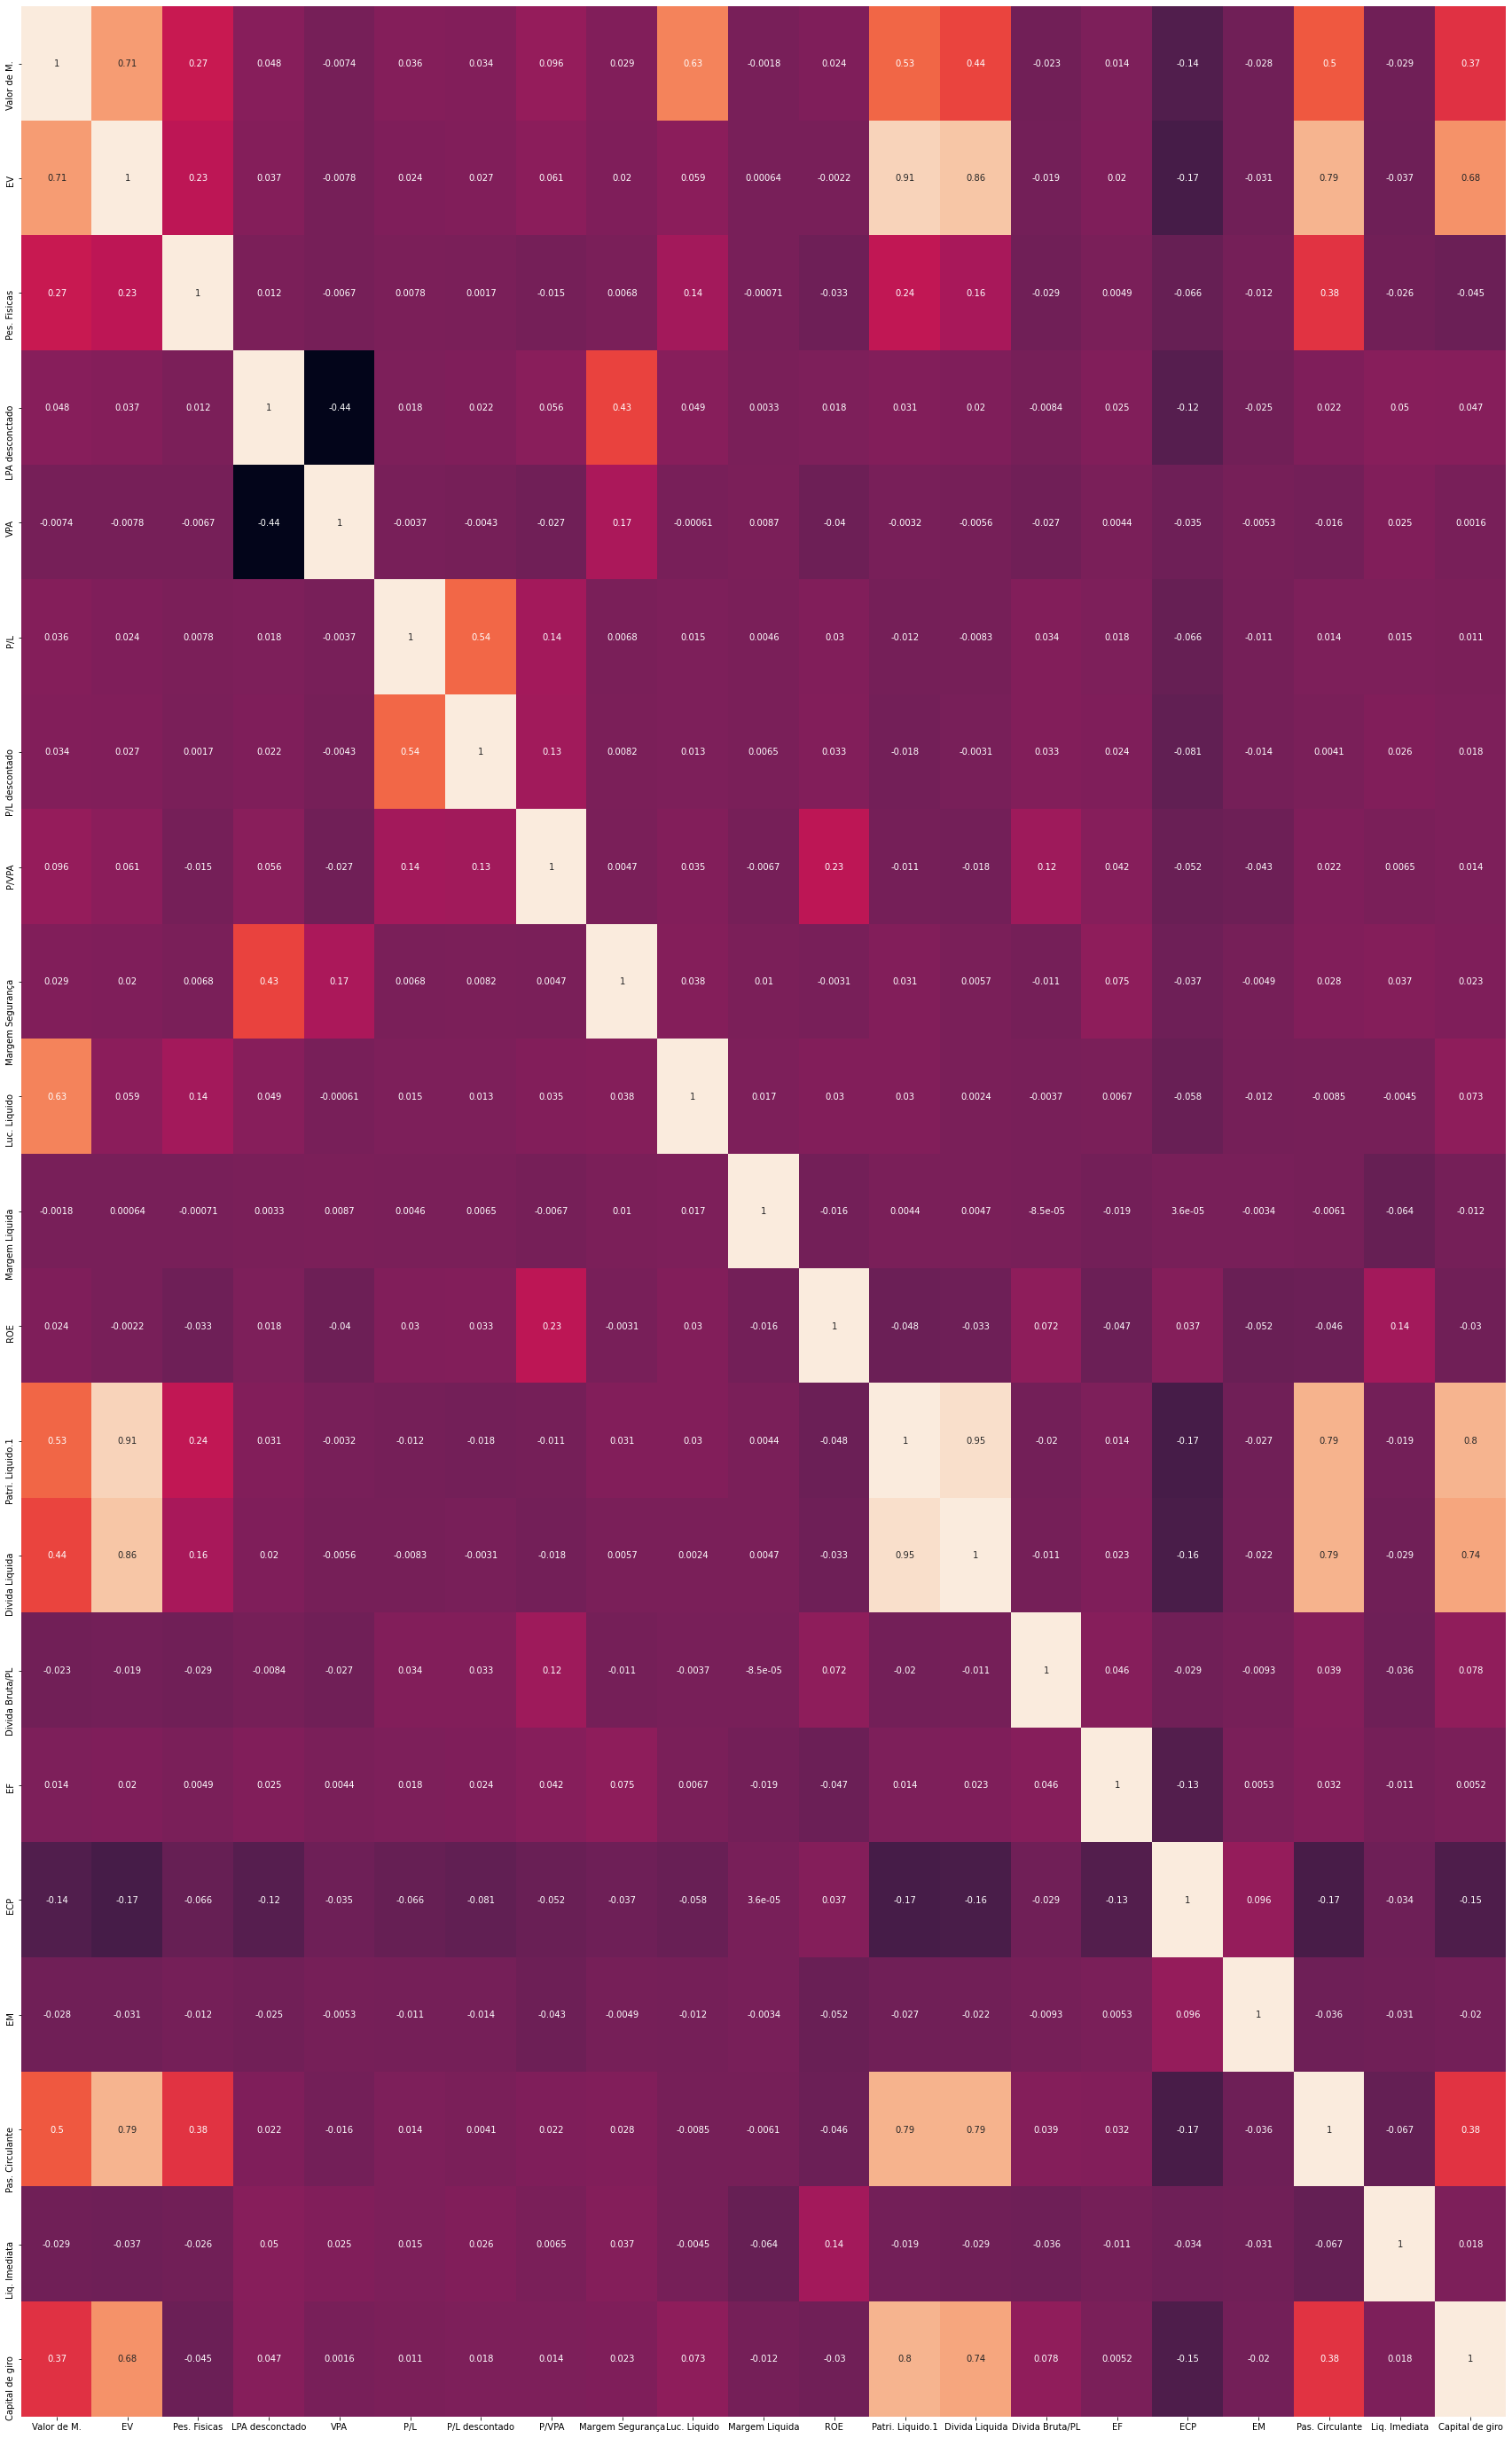

In [ ]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

## Variáveis dummy

In [ ]:
dataset.head(1)

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.0,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,0.0648,20.66,2012.0,1567.0,0.86,49.0,11.0,3.94,4508.0,0.12,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# aéreo - 0
# turismo - 1
# bebidas - 2
# 1 0 0
# 0 1 0
# 0 0 1

In [ ]:
y = dataset['Situação'].values
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [ ]:
empresa = dataset['Empresa']
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [ ]:
X_cat = dataset[['Segmento', 'Categoria']]
X_cat

,Segmento,Categoria
0,energia eletrica,alerta
1,energia eletrica,dividendos
2,energia eletrica,alerta
3,energia eletrica,alerta
4,bancos,crescimento moderado
...,...,...
372,eletrodomesticos,dividendos
373,serviços de apoio e armazenagem,alerta
374,material de transporte,alerta
375,outros,alerta


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])

In [ ]:
X_cat.shape

(347, 90)

In [ ]:
type(X_cat)

numpy.ndarray

In [ ]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [ ]:
dataset_original = dataset.copy()

In [ ]:
dataset.drop(['Segmento', 'Categoria', 'Situação', 'Empresa'], axis = 1, inplace = True)

In [ ]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [ ]:
dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            366, 367, 369, 370, 371, 372, 373, 374, 375, 376],
           dtype='int64', length=347)

In [ ]:
X_cat.index

RangeIndex(start=0, stop=347, step=1)

In [ ]:
dataset.index = X_cat.index

In [ ]:
dataset.index, X_cat.index

(RangeIndex(start=0, stop=347, step=1), RangeIndex(start=0, stop=347, step=1))

In [ ]:
dataset = pd.concat([dataset, X_cat], axis = 1)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.3500

## Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_normalizado = scaler.fit_transform(dataset)

In [ ]:
dataset_normalizado

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
dataset_normalizado[0]

array([4.65507421e-03, 8.83755803e-03, 8.85280057e-03, 8.34387662e-01,
       2.05380580e-01, 5.15880181e-01, 2.66367295e-01, 3.95936571e-01,
       8.89262572e-01, 1.53146818e-01, 4.87787134e-01, 7.23820201e-02,
       2.22420717e-02, 5.02049230e-02, 1.26470588e-02, 6.31697145e-01,
       1.10000000e-01, 4.35870506e-04, 5.55281768e-02, 3.93442623e-03,
       3.45650017e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
X = dataset_normalizado.copy()
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X.shape

(347, 111)

In [ ]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

## Aplicação e avaliação dos algoritmos

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
(347 + 3) / 2

175.0

In [ ]:
resultados_forest = []
resultados_neural = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest.append(scores.mean())

  network = MLPClassifier(hidden_layer_sizes=(175, 175))
  scores = cross_val_score(network, X, y, cv = kfold)
  resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)

In [ ]:
resultados_forest

array([0.6397479 , 0.63445378, 0.64243697, 0.64882353, 0.64235294,
       0.65689076, 0.64815126, 0.64319328, 0.64294118, 0.66294118,
       0.63966387, 0.65722689, 0.65420168, 0.63630252, 0.62798319,
       0.62815126, 0.63957983, 0.64865546, 0.63117647, 0.64563025,
       0.65142857, 0.64252101, 0.6487395 , 0.63436975, 0.6492437 ,
       0.65428571, 0.64823529, 0.6310084 , 0.6512605 , 0.63403361])

In [ ]:
resultados_neural

array([0.53268908, 0.52411765, 0.54747899, 0.55579832, 0.52966387,
       0.55268908, 0.55058824, 0.51605042, 0.54462185, 0.54159664,
       0.54453782, 0.54226891, 0.54159664, 0.53302521, 0.55378151,
       0.55655462, 0.5589916 , 0.56546218, 0.53571429, 0.53016807,
       0.5505042 , 0.54420168, 0.54798319, 0.54201681, 0.53655462,
       0.53554622, 0.54504202, 0.53857143, 0.55932773, 0.52201681])

In [ ]:
resultados_forest.mean(), resultados_neural.mean()

(0.6438543417366946, 0.5426386554621848)

## Avaliação com base de treinamento e teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_treinamento.shape, y_treinamento.shape

((277, 111), (277,))

In [ ]:
X_teste.shape, y_teste.shape

((70, 111), (70,))

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
previsoes = random_forest.predict(X_teste)

In [ ]:
previsoes

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim',
       'boa', 'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'ruim',
       'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'ruim',
       'boa', 'ruim', 'medio', 'ruim', 'medio', 'ruim', 'boa', 'boa',
       'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'medio',
       'boa', 'ruim', 'boa', 'ruim', 'boa', 'boa', 'ruim', 'boa', 'boa',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'boa', 'medio',
       'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'medio', 'medio', 'medio', 'medio', 'ruim'], dtype=object)

In [ ]:
y_teste

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'medio', 'ruim',
       'boa', 'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'medio', 'ruim',
       'boa', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'boa', 'boa',
       'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'ruim', 'boa', 'boa', 'ruim', 'boa', 'medio',
       'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim', 'boa', 'boa',
       'boa', 'ruim', 'ruim', 'medio', 'medio', 'ruim', 'medio', 'medio',
       'medio', 'ruim', 'medio', 'medio', 'ruim'], dtype=object)

In [ ]:
accuracy_score(y_teste, previsoes)

0.6857142857142857

In [ ]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[10,  3,  3],
       [ 3,  7,  9],
       [ 1,  3, 31]])

In [ ]:
(10 + 7 + 31) / 70

0.6857142857142857

In [ ]:
random_forest.classes_

array(['boa', 'medio', 'ruim'], dtype=object)

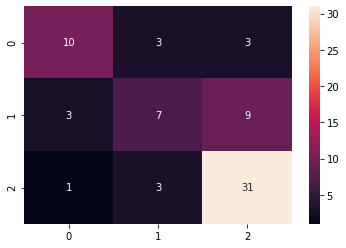

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         boa       0.71      0.62      0.67        16
       medio       0.54      0.37      0.44        19
        ruim       0.72      0.89      0.79        35

    accuracy                           0.69        70
   macro avg       0.66      0.63      0.63        70
weighted avg       0.67      0.69      0.67        70



In [ ]:
X_teste[0].shape

(111,)

In [ ]:
X_teste[0].reshape(1, -1)

array([[2.99869364e-02, 2.04920889e-02, 1.34166942e-04, 8.24792225e-01,
        2.05454479e-01, 5.07754881e-01, 2.56586540e-01, 4.28087310e-01,
        8.82693632e-01, 1.25269978e-01, 4.88554891e-01, 1.05104579e-02,
        2.80285727e-02, 5.26698366e-02, 2.53060413e-02, 6.25777589e-01,
        3.88720645e-01, 9.16917886e-03, 3.12360454e-02, 3.27588711e-02,
        3.51850828e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
random_forest.predict(X_teste[12].reshape(1, -1))

array(['ruim'], dtype=object)

In [ ]:
random_forest.feature_importances_

array([5.82852446e-02, 3.80880892e-02, 4.22858683e-02, 7.67869955e-02,
       4.81475819e-02, 3.04538444e-02, 4.01144819e-02, 5.07232908e-02,
       4.34496811e-02, 5.75955994e-02, 3.32018838e-02, 3.16601254e-02,
       3.98342374e-02, 3.81924843e-02, 3.59662329e-02, 2.85851024e-02,
       2.89046439e-02, 4.11528747e-02, 3.36328211e-02, 3.02146163e-02,
       3.16031499e-02, 4.56465939e-04, 5.51390998e-03, 5.36470522e-04,
       1.25218949e-03, 1.44421460e-03, 0.00000000e+00, 0.00000000e+00,
       3.45537513e-04, 1.44827427e-03, 6.96697511e-04, 2.67222809e-03,
       3.15096972e-04, 8.75154565e-05, 0.00000000e+00, 8.25789452e-04,
       2.56694216e-03, 0.00000000e+00, 1.43458452e-04, 1.29105322e-04,
       3.92239168e-04, 1.58719783e-04, 8.28951374e-04, 2.22777694e-04,
       3.55999726e-03, 1.16612351e-03, 0.00000000e+00, 5.56418470e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.75737986e-03, 8.44334833e-04, 8.41932944e-04, 0.00000000e+00,
      

In [ ]:
np.argmax(random_forest.feature_importances_)

3

In [ ]:
for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
  print(nome, ' = ', importancia)

Valor de M.  =  0.058285244604775695
EV  =  0.03808808917533474
Pes. Fisicas  =  0.04228586832553642
LPA desconctado  =  0.07678699553822366
VPA  =  0.048147581925351166
P/L  =  0.03045384437737095
P/L descontado  =  0.04011448187063242
P/VPA  =  0.050723290762924915
Margem Segurança  =  0.04344968106921588
Luc. Liquido  =  0.0575955993999607
Margem Liquida  =  0.03320188383405143
ROE  =  0.03166012540316715
Patri. Liquido.1  =  0.03983423737959024
Divida Liquida  =  0.03819248425913603
Divida Bruta/PL  =  0.035966232933581754
EF  =  0.028585102422226536
ECP  =  0.028904643921259455
EM  =  0.041152874706415696
Pas. Circulante  =  0.033632821131889555
Liq. Imediata  =  0.03021461633620885
Capital de giro  =  0.03160314993521659
0  =  0.00045646593918802236
1  =  0.0055139099785494914
2  =  0.0005364705220642975
3  =  0.0012521894907491233
4  =  0.0014442145992147237
5  =  0.0
6  =  0.0
7  =  0.00034553751255634495
8  =  0.0014482742729703838
9  =  0.000696697511295734
10  =  0.002672228

In [ ]:
caracteristicas = dataset.columns
caracteristicas

Index([     'Valor de M.',               'EV',     'Pes. Fisicas',
        'LPA desconctado',              'VPA',              'P/L',
         'P/L descontado',            'P/VPA', 'Margem Segurança',
           'Luc. Liquido',
       ...
                       80,                 81,                 82,
                       83,                 84,                 85,
                       86,                 87,                 88,
                       89],
      dtype='object', length=111)

In [ ]:
importancias = random_forest.feature_importances_
importancias

array([5.82852446e-02, 3.80880892e-02, 4.22858683e-02, 7.67869955e-02,
       4.81475819e-02, 3.04538444e-02, 4.01144819e-02, 5.07232908e-02,
       4.34496811e-02, 5.75955994e-02, 3.32018838e-02, 3.16601254e-02,
       3.98342374e-02, 3.81924843e-02, 3.59662329e-02, 2.85851024e-02,
       2.89046439e-02, 4.11528747e-02, 3.36328211e-02, 3.02146163e-02,
       3.16031499e-02, 4.56465939e-04, 5.51390998e-03, 5.36470522e-04,
       1.25218949e-03, 1.44421460e-03, 0.00000000e+00, 0.00000000e+00,
       3.45537513e-04, 1.44827427e-03, 6.96697511e-04, 2.67222809e-03,
       3.15096972e-04, 8.75154565e-05, 0.00000000e+00, 8.25789452e-04,
       2.56694216e-03, 0.00000000e+00, 1.43458452e-04, 1.29105322e-04,
       3.92239168e-04, 1.58719783e-04, 8.28951374e-04, 2.22777694e-04,
       3.55999726e-03, 1.16612351e-03, 0.00000000e+00, 5.56418470e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.75737986e-03, 8.44334833e-04, 8.41932944e-04, 0.00000000e+00,
      

In [ ]:
indices = np.argsort(importancias)
indices

array([ 55,  48,  51,  46,  37,  34,  27,  26,  49,  70,  87,  50,  88,
        60,  74,  81,  77,  61,  33,  76,  69, 102,  39,  38,  86,  41,
       105,  43,  95, 101,  73,  99,  32,  28,  62,  65,  93,  66,  40,
        82,  21,  67, 103,  68,  94,  23,  75,  91,  83,  64,  30, 110,
       104, 100,  35,  42,  79,  54,  53,  57,  84,  85,  96,  92,  45,
        24,  97,  59,  56,  89,  90,  25,  29,  98,  78,  58,  52,  36,
        71,  31,  63,  80,  44,  72, 107,  22,  47, 109, 108,  15,  16,
        19,   5,  20,  11,  10,  18,  14, 106,   1,  13,  12,   6,  17,
         2,   8,   4,   7,   9,   0,   3])

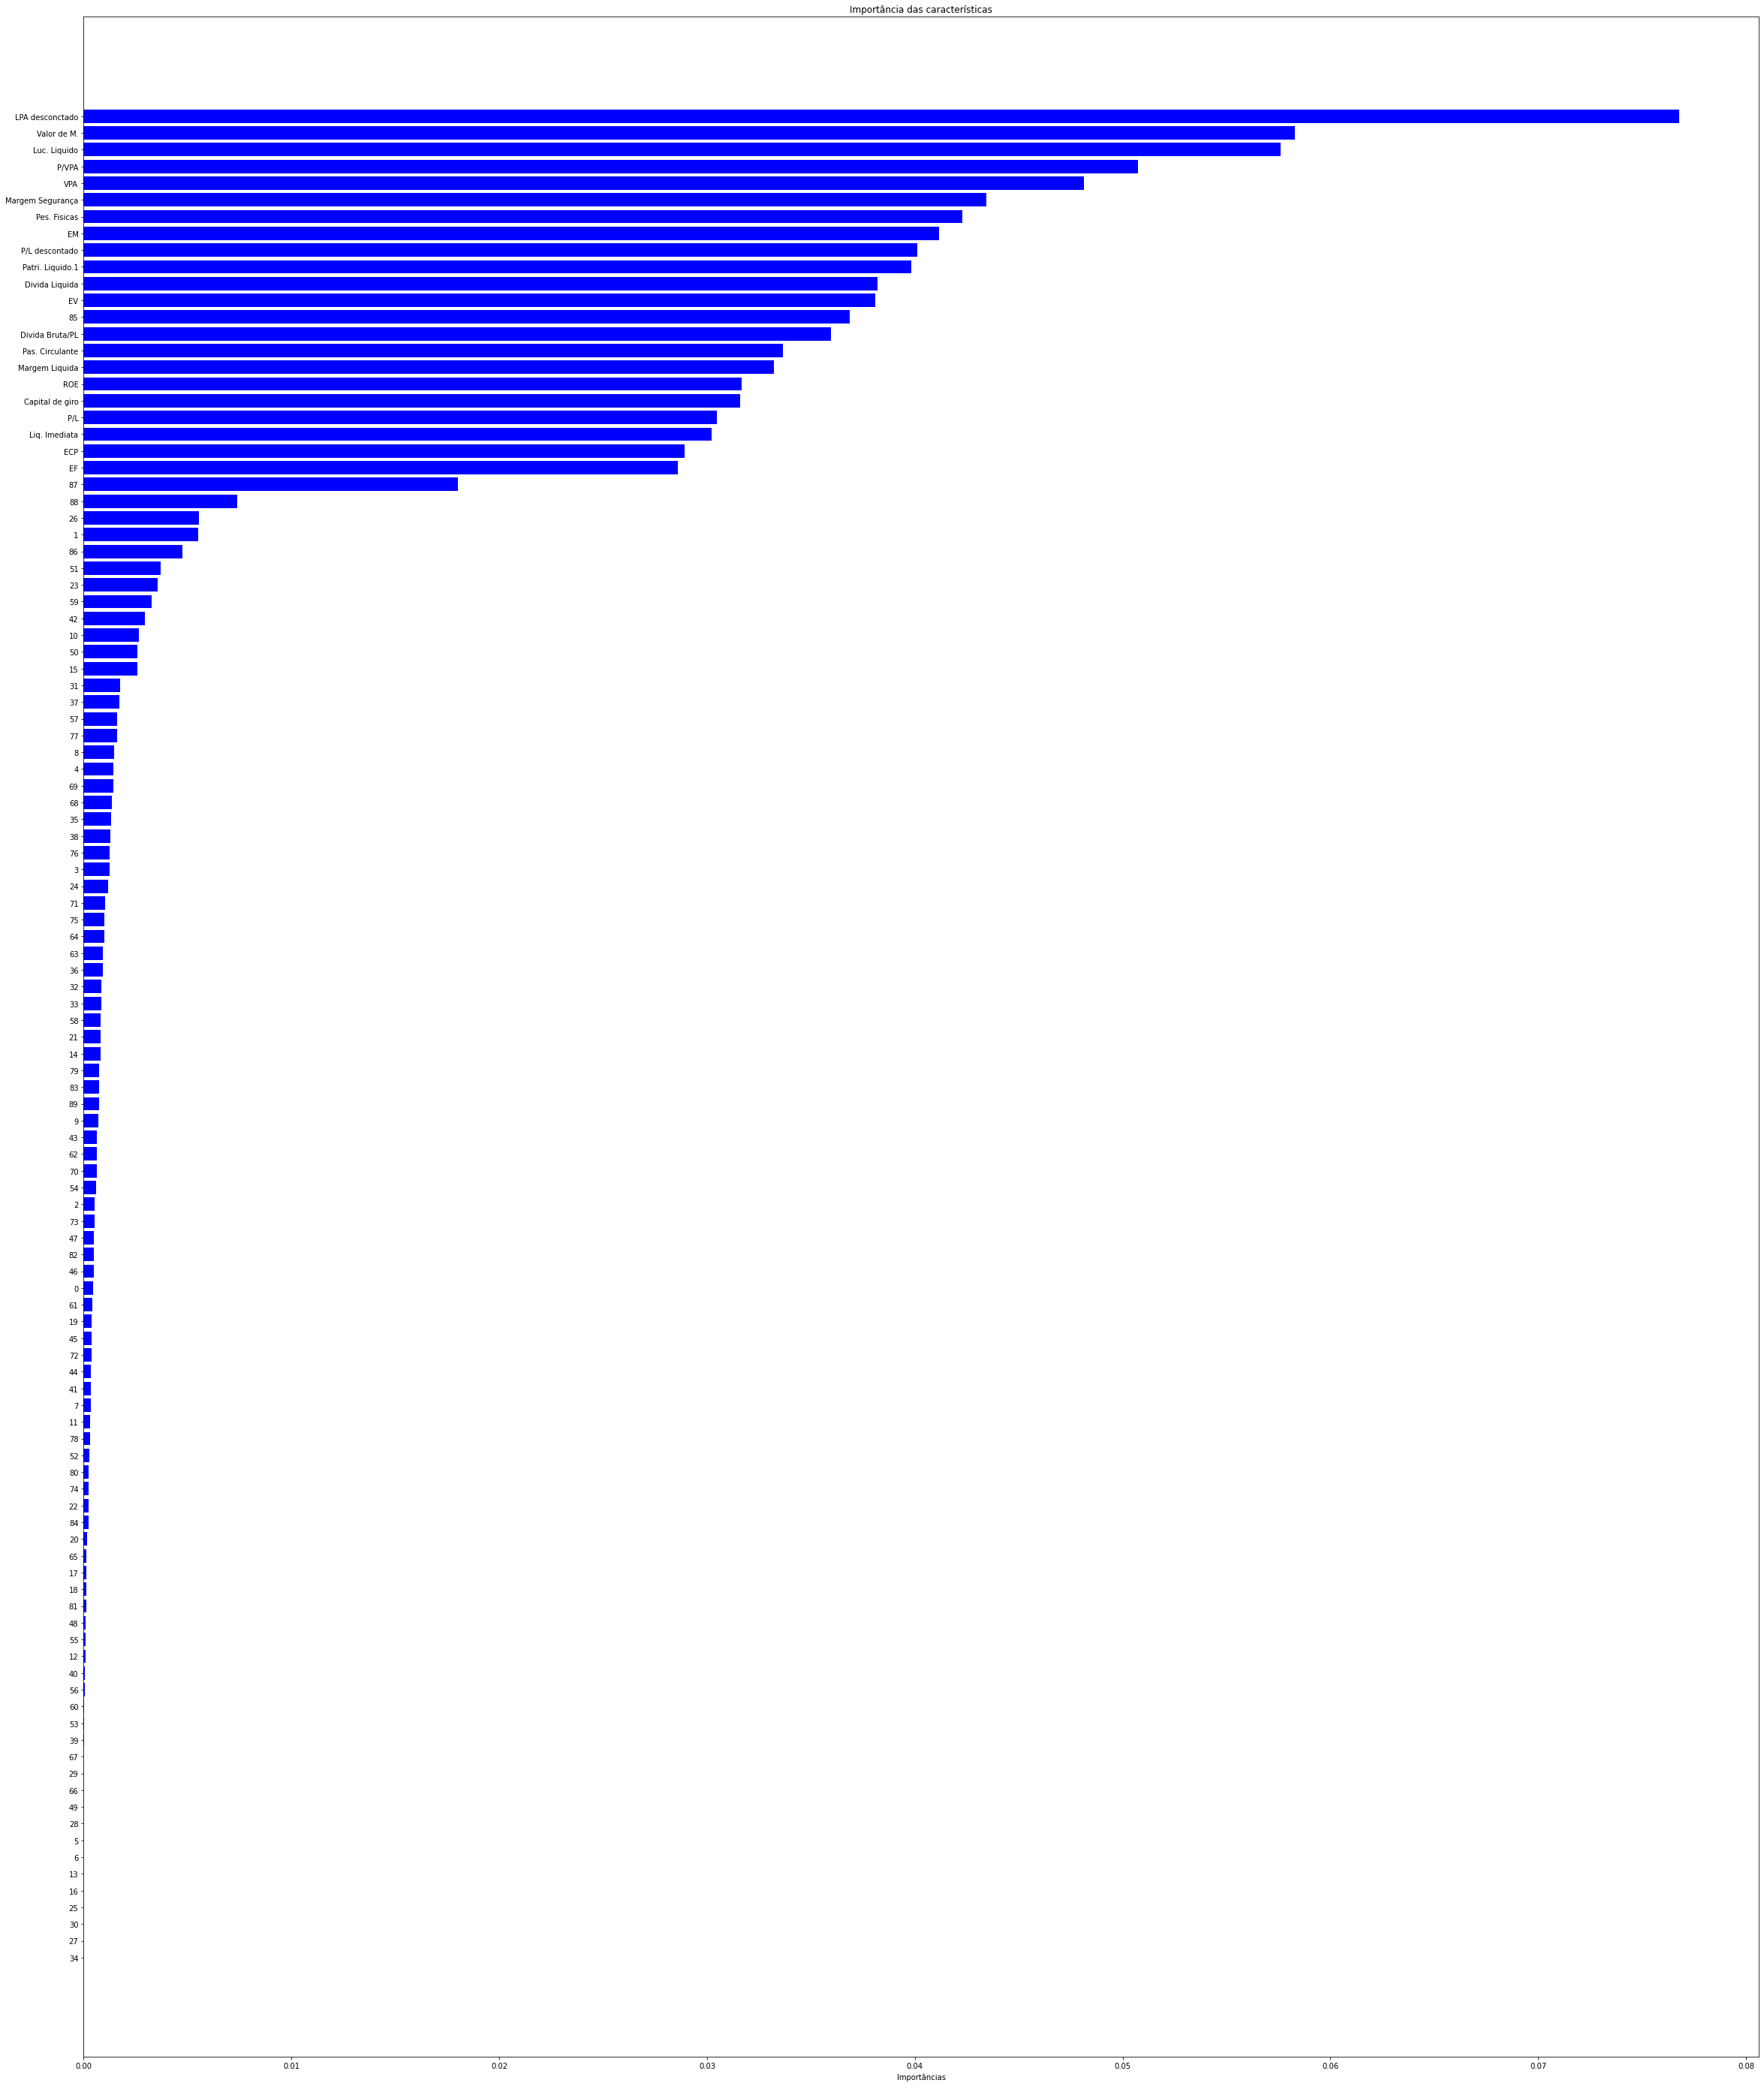

In [ ]:
plt.figure(figsize=(40,50))
plt.title('Importância das características')
plt.barh(range(len(indices)), importancias[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importâncias')
plt.show();

In [ ]:
import pickle

In [ ]:
with open('bases_classificacao.pkl', 'wb') as f:
  pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)

## Exercício

In [ ]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [50, 100, 150]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

{'criterion': 'entropy', 'min_samples_split': 6, 'n_estimators': 50} 0.668695652173913


## Agrupamento de empresas

### Preparação da base de dados

In [ ]:
import pickle
with open('bases_classificacao.pkl', 'rb') as f:
  dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [ ]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.3500

In [ ]:
dataset_original

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [ ]:
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [ ]:
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [ ]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

### Obtenção do número de clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = [] # within cluster sum of squares
faixa = range(1, 21)
for i in faixa:
  #print(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[549.5537304637769, 447.0755844180393, 406.3726830716314, 390.44838298214, 365.3396146476162, 344.7722306421713, 333.45827473619624, 321.1513379676537, 313.06557331291424, 302.0646634289343, 292.91299395292066, 285.16211234338243, 272.245516843975, 276.95538453008743, 264.48266043194747, 259.70165422105345, 255.37874179772592, 250.43976956285243, 243.65952251322489, 246.23673368734862]


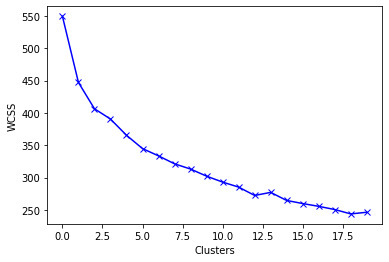

In [ ]:
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

### Agrupamento com k-means

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.labels_
labels, len(labels)

(array([0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
        2, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 0,
        0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
        0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0,
        2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 

In [ ]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([243,  48,  56]))

In [ ]:
kmeans.cluster_centers_

array([[ 1.71397703e-02,  1.78038575e-02,  6.37039823e-03,
         8.19715035e-01,  2.05948694e-01,  5.02590869e-01,
         2.52603934e-01,  4.12824147e-01,  8.79532811e-01,
         1.27551627e-01,  4.87249041e-01,  6.11572786e-02,
         2.88151404e-02,  5.56513043e-02,  3.04680334e-02,
         6.24785325e-01,  4.13064957e-01,  1.03126836e-02,
         3.36489794e-02,  2.82877917e-02,  3.51662245e-01,
         8.23045267e-03,  1.23456790e-02,  4.11522634e-03,
         8.23045267e-03, -2.34187669e-17,  4.11522634e-03,
         4.11522634e-03,  1.64609053e-02,  1.23456790e-02,
         8.23045267e-03,  4.52674897e-02, -1.17093835e-17,
         8.23045267e-03,  8.23045267e-03,  8.23045267e-03,
         1.64609053e-02, -1.17093835e-17, -1.17093835e-17,
         8.23045267e-03,  8.23045267e-03,  1.64609053e-02,
         4.11522634e-03,  8.23045267e-03,  6.58436214e-02,
         1.23456790e-02,  8.23045267e-03,  1.02880658e-01,
         4.11522634e-03,  4.11522634e-03, -1.17093835e-1

In [ ]:
dataset.columns

Index([     'Valor de M.',               'EV',     'Pes. Fisicas',
        'LPA desconctado',              'VPA',              'P/L',
         'P/L descontado',            'P/VPA', 'Margem Segurança',
           'Luc. Liquido',
       ...
                       80,                 81,                 82,
                       83,                 84,                 85,
                       86,                 87,                 88,
                       89],
      dtype='object', length=111)

In [ ]:
import pandas as pd
centroides = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.017140,0.017804,0.006370,0.819715,0.205949,0.502591,0.252604,0.412824,0.879533,0.127552,0.487249,0.061157,0.028815,0.055651,0.030468,0.624785,0.413065,0.010313,0.033649,0.028288,0.351662,8.230453e-03,1.234568e-02,0.004115,8.230453e-03,-2.341877e-17,4.115226e-03,4.115226e-03,1.646091e-02,1.234568e-02,8.230453e-03,0.045267,-1.170938e-17,8.230453e-03,8.230453e-03,8.230453e-03,1.646091e-02,-1.170938e-17,-1.170938e-17,8.230453e-03,...,0.016461,0.016461,1.234568e-02,4.115226e-03,-1.170938e-17,4.115226e-03,4.115226e-03,0.049383,2.057613e-02,1.234568e-02,4.115226e-03,4.115226e-03,1.234568e-02,1.234568e-02,8.230453e-03,4.115226e-03,-1.170938e-17,0.004115,4.115226e-03,-4.683753e-17,4.115226e-03,2.057613e-02,1.234568e-02,-2.341877e-17,-2.341877e-17,1.646091e-02,0.016461,1.646091e-02,1.234568e-02,1.646091e-02,4.115226e-03,8.230453e-03,4.115226e-03,-1.170938e-17,-1.170938e-17,1.000000e+00,-4.163336e-17,4.718448e-16,-8.326673e-17,-2.341877e-17
1,0.092151,0.035921,0.012434,0.835668,0.204321,0.509163,0.257351,0.441675,0.888709,0.192410,0.489064,0.064960,0.031028,0.046418,0.013217,0.625941,0.326972,0.001480,0.031656,0.059504,0.359659,3.469447e-18,6.938894e-18,0.020833,6.938894e-18,2.083333e-02,1.734723e-18,1.734723e-18,-1.734723e-18,6.938894e-18,3.469447e-18,0.187500,1.734723e-18,3.469447e-18,3.469447e-18,4.166667e-02,4.166667e-02,2.083333e-02,2.083333e-02,3.469447e-18,...,0.041667,0.020833,3.469447e-18,1.734723e-18,2.083333e-02,1.734723e-18,1.734723e-18,0.020833,-1.734723e-18,3.469447e-18,1.734723e-18,3.469447e-18,-1.734723e-18,6.938894e-18,3.469447e-18,1.734723e-18,1.734723e-18,0.020833,2.083333e-02,6.250000e-02,1.734723e-18,-1.734723e-18,4.166667e-02,3.469447e-18,4.166667e-02,2.083333e-02,0.041667,6.938894e-18,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,1.734723e-18,2.083333e-02,2.220446e-16,-1.387779e-17,1.000000e+00,-2.775558e-17,3.469447e-18
2,0.036923,0.021832,0.038169,0.835440,0.204667,0.530641,0.275834,0.460359,0.889746,0.143534,0.493969,0.064912,0.026528,0.048603,0.017198,0.627739,0.341310,0.008367,0.028115,0.035359,0.349632,4.336809e-18,1.785714e-02,0.035714,3.571429e-02,1.785714e-02,2.168404e-18,2.168404e-18,1.785714e-02,1.785714e-02,1.785714e-02,0.125000,1.785714e-02,4.336809e-18,4.336809e-18,8.673617e-18,1.040834e-17,2.168404e-18,2.168404e-18,4.336809e-18,...,0.017857,0.017857,5.204170e-18,2.168404e-18,2.168404e-18,2.168404e-18,2.168404e-18,0.000000,-5.204170e-18,5.204170e-18,2.168404e-18,1.785714e-02,3.571429e-02,1.785714e-02,4.336809e-18,2.168404e-18,1.785714e-02,0.017857,4.336809e-18,1.785714e-02,2.168404e-18,-5.204170e-18,-5.204170e-18,3.571429e-02,4.336809e-18,-5.204170e-18,0.017857,3.571429e-02,5.204170e-18,8.673617e-18,1.785714e-02,4.336809e-18,1.785714e-02,1.785714e-02,2.168404e-18,6.661338e-16,3.214286e-01,8.326673e-17,6.428571e-01,3.571429e-02


In [ ]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data = centroides, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,...,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,4.913855e+09,8.873909e+09,11491.433800,-13.634886,46.654486,1.746867,7.301137,1.061583,-11813.539400,45.425337,-8.761653,17.456122,3939.999354,2700.539019,2.071826,27.455858,41.306496,70.333715,2732.153063,0.862778,695.899867,8.230453e-03,1.234568e-02,0.004115,8.230453e-03,-2.341877e-17,4.115226e-03,4.115226e-03,1.646091e-02,1.234568e-02,8.230453e-03,0.045267,-1.170938e-17,8.230453e-03,8.230453e-03,8.230453e-03,1.646091e-02,-1.170938e-17,-1.170938e-17,8.230453e-03,...,0.016461,0.016461,1.234568e-02,4.115226e-03,-1.170938e-17,4.115226e-03,4.115226e-03,0.049383,2.057613e-02,1.234568e-02,4.115226e-03,4.115226e-03,1.234568e-02,1.234568e-02,8.230453e-03,4.115226e-03,-1.170938e-17,0.004115,4.115226e-03,-4.683753e-17,4.115226e-03,2.057613e-02,1.234568e-02,-2.341877e-17,-2.341877e-17,1.646091e-02,0.016461,1.646091e-02,1.234568e-02,1.646091e-02,4.115226e-03,8.230453e-03,4.115226e-03,-1.170938e-17,-1.170938e-17,1.000000e+00,-4.163336e-17,4.718448e-16,-8.326673e-17,-2.341877e-17
1,2.641881e+10,1.793046e+10,22427.625000,1.798271,16.208333,13.102499,13.305388,2.225992,-672.510528,1336.682500,21.007839,18.541667,4589.104046,778.819907,0.898727,31.057811,32.697183,10.961419,2570.411958,1.814875,1485.827070,3.469447e-18,6.938894e-18,0.020833,6.938894e-18,2.083333e-02,1.734723e-18,1.734723e-18,-1.734723e-18,6.938894e-18,3.469447e-18,0.187500,1.734723e-18,3.469447e-18,3.469447e-18,4.166667e-02,4.166667e-02,2.083333e-02,2.083333e-02,3.469447e-18,...,0.041667,0.020833,3.469447e-18,1.734723e-18,2.083333e-02,1.734723e-18,1.734723e-18,0.020833,-1.734723e-18,3.469447e-18,1.734723e-18,3.469447e-18,-1.734723e-18,6.938894e-18,3.469447e-18,1.734723e-18,1.734723e-18,0.020833,2.083333e-02,6.250000e-02,1.734723e-18,-1.734723e-18,4.166667e-02,3.469447e-18,4.166667e-02,2.083333e-02,0.041667,6.938894e-18,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,1.734723e-18,2.083333e-02,2.220446e-16,-1.387779e-17,1.000000e+00,-2.775558e-17,3.469447e-18
2,1.058551e+10,1.088747e+10,68848.147646,1.578518,22.679500,50.216428,36.683879,2.980093,586.698166,363.612967,101.470978,18.527857,3269.254983,1233.595207,1.169474,36.663102,34.131015,57.257589,2282.989980,1.078449,495.343354,4.336809e-18,1.785714e-02,0.035714,3.571429e-02,1.785714e-02,2.168404e-18,2.168404e-18,1.785714e-02,1.785714e-02,1.785714e-02,0.125000,1.785714e-02,4.336809e-18,4.336809e-18,8.673617e-18,1.040834e-17,2.168404e-18,2.168404e-18,4.336809e-18,...,0.017857,0.017857,5.204170e-18,2.168404e-18,2.168404e-18,2.168404e-18,2.168404e-18,0.000000,-5.204170e-18,5.204170e-18,2.168404e-18,1.785714e-02,3.571429e-02,1.785714e-02,4.336809e-18,2.168404e-18,1.785714e-02,0.017857,4.336809e-18,1.785714e-02,2.168404e-18,-5.204170e-18,-5.204170e-18,3.571429e-02,4.336809e-18,-5.204170e-18,0.017857,3.571429e-02,5.204170e-18,8.673617e-18,1.785714e-02,4.336809e-18,1.785714e-02,1.785714e-02,2.168404e-18,6.661338e-16,3.214286e-01,8.326673e-17,6.428571e-01,3.571429e-02


In [ ]:
dataset_cluster = pd.concat([empresa, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

,Empresa,cluster
0,aes elpa s.a,0.0
1,tiet aes tiete,2.0
2,aflu afluente,0.0
3,aflu afluente t,0.0
4,rpad alfa holding,1.0
...,...,...
372,whirlpool s.a whrl,NaN
373,wilson sons ltd wson,NaN
374,wlm industria e comercia s.a sgas,NaN
375,zain participações s.a opzi,NaN


In [ ]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,Margem Liquida,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,cluster
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,0.064800,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,0.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,34.690000,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,2.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,38.150000,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,0.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,56.000000,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,0.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,157.450000,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,6.180000,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,NaN
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,9.360000,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,NaN
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,2.210000,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000,NaN
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,12.658474,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000,NaN


In [ ]:
categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0        164
                          1.0         26
                          2.0         37
crescimento               0.0         11
                          1.0          3
                                    ... 
crescimento moderado      2.0          4
dividendos                0.0         19
                          1.0          4
                          2.0          8
dividendos + crescimento  0.0          2
Name: cluster, Length: 13, dtype: int64

In [ ]:
situacao_cluster = dataset_cluster.groupby(['Situação', 'cluster'])['cluster'].count()
situacao_cluster

Situação  cluster
boa       0.0         48
          1.0         16
          2.0         17
medio     0.0         58
          1.0         12
          2.0         10
ruim      0.0        117
          1.0         17
          2.0         25
Name: cluster, dtype: int64

In [ ]:
pd.set_option('max_rows', None)
segmento_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
segmento_cluster

Segmento                                    cluster
acessorios                                  0.0         2
agricultura                                 0.0         3
                                            2.0         1
agua e saneamento                           0.0         4
alimentos                                   0.0         3
                                            2.0         1
aluguel de carros                           0.0         2
armas e munições                            1.0         1
artefatos de cobre                          0.0         1
artefatos de ferro e aço                    0.0         4
                                            2.0         1
automoveis e motocicletas                   0.0         4
açucar e alcool                             0.0         2
                                            2.0         1
bancos                                      0.0        12
                                            1.0         5
                    

### Visualização

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X)
componentes

array([[-2.75371422e-01,  5.45708241e-01],
       [ 8.19667857e-01,  1.17432516e+00],
       [-2.98875193e-01,  5.07039457e-01],
       [-2.81480235e-01,  5.27281643e-01],
       [ 1.03169003e+00, -6.60007139e-01],
       [-3.38568275e-01, -4.16567599e-02],
       [-3.56719192e-01, -4.07534059e-02],
       [-3.50335694e-01, -3.52772437e-02],
       [ 9.04650247e-01, -5.93812854e-01],
       [-2.77094853e-01,  5.41610842e-01],
       [-3.51329011e-01, -2.13270615e-02],
       [ 7.34019349e-01,  5.33231467e-01],
       [-3.93265749e-01, -9.82878477e-02],
       [ 9.74965061e-01, -5.77750140e-01],
       [-3.99552366e-01, -8.86833694e-02],
       [-3.31532656e-01,  2.69588699e-03],
       [ 9.81654300e-01,  4.93061319e-02],
       [-3.30136442e-01, -8.20708565e-04],
       [-4.19271180e-01, -1.43930390e-01],
       [ 6.96558632e-01, -6.54634058e-02],
       [-3.74519572e-01, -7.67006641e-02],
       [-4.00633449e-01, -9.19771574e-02],
       [ 5.66626220e-01,  4.34593995e-02],
       [ 1.

In [ ]:
pca_df = pd.DataFrame(data = componentes, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.275371,0.545708
1,0.819668,1.174325
2,-0.298875,0.507039
3,-0.281480,0.527282
4,1.031690,-0.660007


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.275371,0.545708,0
1,0.819668,1.174325,2
2,-0.298875,0.507039,0
3,-0.281480,0.527282,0
4,1.031690,-0.660007,1


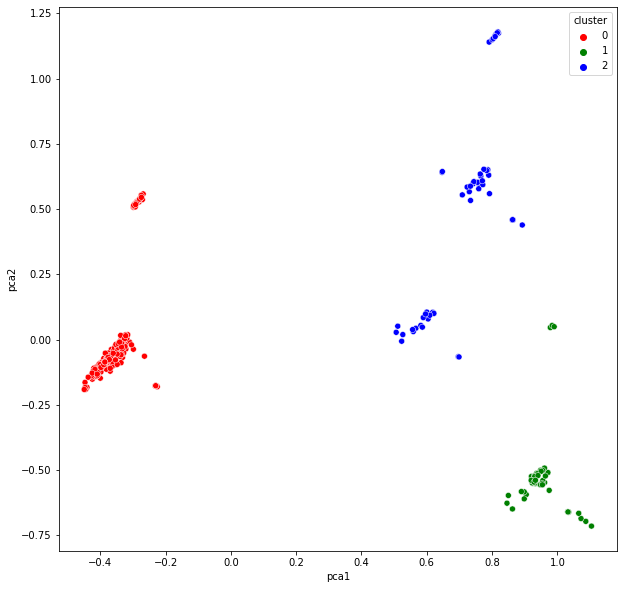

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue'])